# Image to Image Translation

Image to Image Translation means using GANs to map from one type of image to another type, to create a new image. This lesson will focus on a particular image-to-image translation architecture, known as the CycleGAN model.

By the end of this lesson, you will be able to:
- Implement unpaired images dataloaders
- Build residual blocks and incorporate them in the CycleGAN generator
- Train a CycleGAN model on an image dataset

## Image to Image Translation
Generating new data is a challenging task; however, GAN models can learn something about the underlying structure of training data, to discern patterns that can be used to recreate images.

GANs can also be applied to Image to Image Translation:
- Image to Image Translation – takes an input image and produces a transformed image as output

## Applications for Image to Image Translation
Deep learning and computer vision applications of image to image translation include:
- Semantic Segmentation - every pixel in the input image is labeled and classified
- Translating an image into a new domain with a desired property or feature

Pix2Pix and CycleGAN are two formulations of image to image translation that learn to transform an input image into a desired output and they can be applied to a variety of tasks.

## GANs, a recap

### Latent Space
Latent means "hidden" or "concealed". In the context of neural networks, **a latent space often means a feature space, and a latent vector is just a compressed, feature-level representation of an image!**

For example, when you created a simple autoencoder, the outputs that connected the encoder and decoder portion of a network made up a compressed representation that could also be referred to as a latent vector.

You can read more about latent space in [this blog post] as well as an interesting property of this space: recall that we can mathematically operate on vectors in vector space and with latent vectors, we can perform a kind of feature-level transformation on an image!

This manipulation of latent space has even been used to create an interactive GAN, iGAN(opens in a new tab) for interactive image generation! I recommend reading the paper

## Designing loss functions

What is a good way to measure the distance between two images?
- Pixel distance: We could do a pixel by pixel comparions by using Euclidean distance
  - A bit too simple: think of comparions between orange and basketball, very similar pixel values


## Pix2Pix Generator

The pix2pix model works by training on pairs of images such as building facade labels to building facades, and then attempts to generate the corresponding output image from any input image you give it.

In the Pix2Pix architecture, there needs to be a way to associate an input image with its correct output image.
- The discriminator can be modified to measure the input and output
- Instead of identifying a single image as real or fake, it will look at pairs of input and output images and output a value for a real pair or fake pair
- This requires pair training data

## CycleGANs & Unpaired data
In practice, paired data is time-intensive and difficult to collect. In some cases, such as stylized images, paired data is impossible to get.

With unpaired data, there is no longer the ability to look at real and fake pairs of data - but the model can be changed to produce an output that belongs to the target domain.
- Cycle Consistency Constraint uses inverse mapping to accomplish this task

### Cycle Consistency Loss
A really interesting place to check cycle consistency is in language translation. Ideally, when you translate one word or phrase from, say, English to Spanish, if you translate it back (from Spanish to English) you will get the same thing!

### Architecture
A CycleGAN is made of two discriminator and two generator networks.

__Discriminators__
The discriminators, $D_X$ and $D_Y$, in this CycleGAN are convolutional neural networks that see an image and attempt to classify it as real or fake. In this case, real is indicated by an output close to 1 and fake as close to 0. The discriminators have the following architecture:

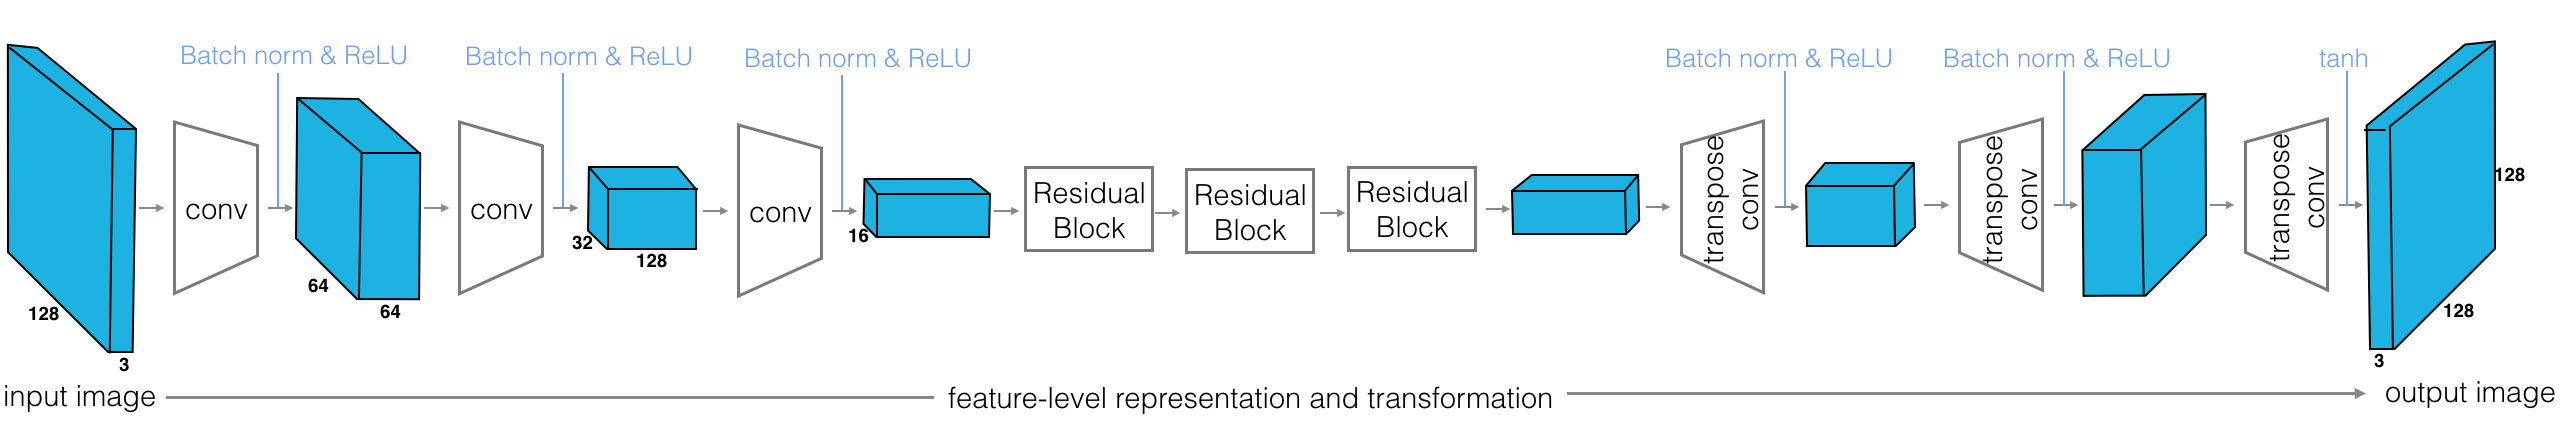

__Generators__ 
The generators, `G_XtoY` and `G_YtoX` (sometimes called F), are made of an **encoder**, a conv net that is responsible for turning an image into a smaller feature representation, and a **decoder**, a *transpose_conv* net that is responsible for turning that representation into an transformed image. These generators, one from XtoY and one from YtoX, have the following architecture:

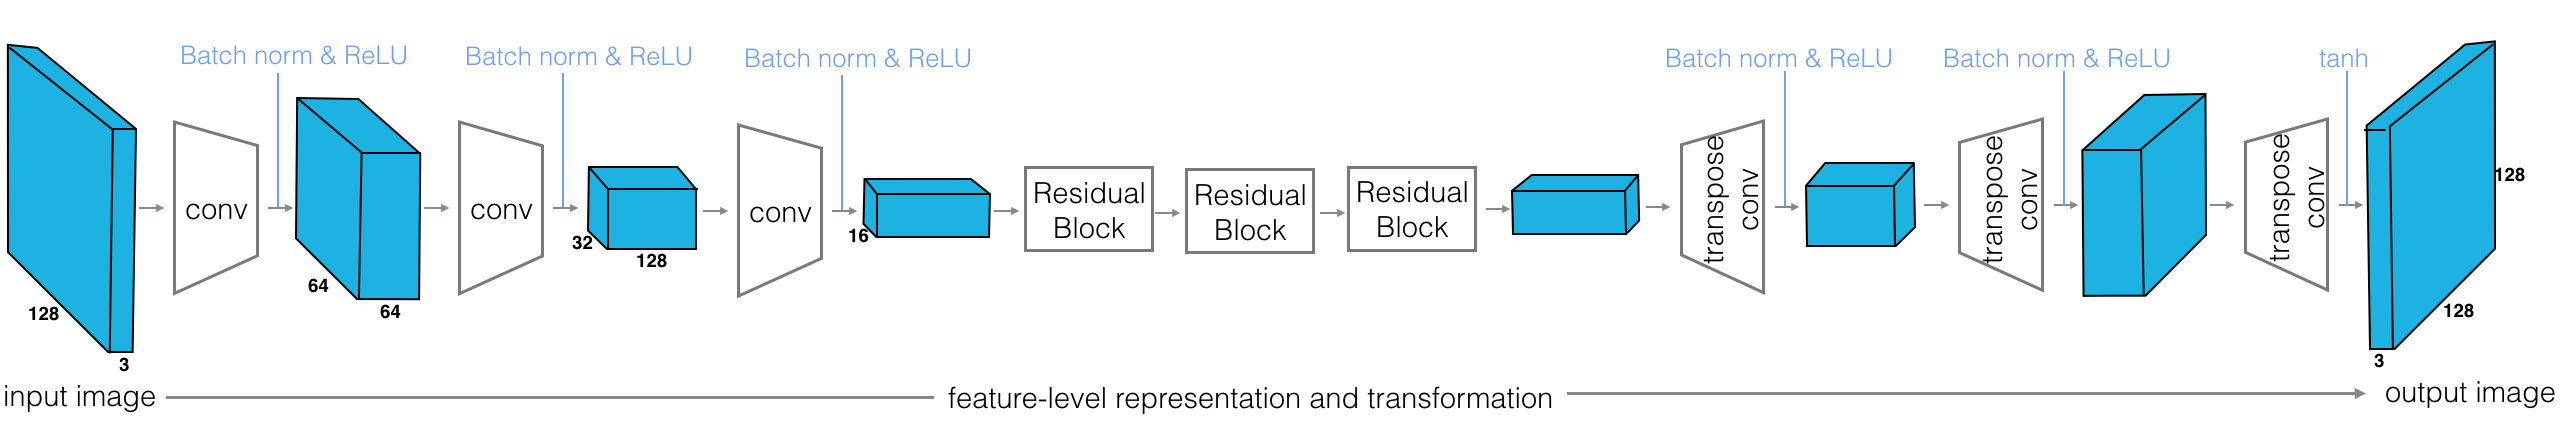


### Shortcomings
A CycleGAN has a few shortcomings:
- It will only show one version of a transformed output even if there are multiple, possible outputs.
- A simple CycleGAN produces low-resolution images, though there is some research around high-resolution GANs(opens in a new tab)
- It occasionally fails!

## When to use Image to Image Translation

One of the challenges with deep learning based solutions is the amount of required data. It takes a significant amount effort and money to:
- Capture real data
- Clean real data
- Annotate real data

### Alternative Data Sources
Another source for data is computer generated data or synthetic data. Synthetic data can be used to train models on tasks such as object detection or classification.

However, because synthetic images are still quite different from real images and model performance is usually not on par with models trained on real data.

The difference between the real and the synthetic domain is called domain gap.